In [2]:
import predefined
import data_preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import pmdarima as pm

rawdata = predefined.LoadRawData(csv='..\\data\\asof_Q1_22.csv')
#rawdata.create_pkl(obj=rawdata.load_csv(), pkl='..\\pkl\\df_raw.pkl')
df_raw = rawdata.load_pkl(pkl='..\\pkl\\df_raw.pkl')

DataPrep = data_preprocessing.DataPreprocessing(dataframe=df_raw)

In [8]:
df_proc = DataPrep.resampling(interval='D')
df_proc = DataPrep.enriching()
#df_proc = DataPrep.outlier_treatment

df_proc.tail(10)

,lq45,jci,idx30,eido,spy,dom_b,dom_s,for_b,for_s,dom_total,dom_net,for_total,for_net
date,,,,,,,,,,,,,
2022-03-18,1003.7680,6954.9648,536.522,24.44,444.52,8.8313,8.9093,10.2448,10.1668,17.7406,-0.0780,20.4116,0.0780
2022-03-21,1003.7580,6955.1812,536.419,24.45,444.39,8.7915,8.2249,4.0812,4.6478,17.0164,0.5666,8.7290,-0.5666
2022-03-22,1011.7530,7000.8218,540.881,24.56,449.59,8.8621,9.5924,4.3819,3.6517,18.4545,-0.7303,8.0336,0.7302
2022-03-23,1011.6840,6996.1152,540.699,24.48,443.80,8.8241,9.6357,5.6179,4.8064,18.4598,-0.8116,10.4243,0.8115
2022-03-24,1026.1890,7049.6851,548.947,24.92,450.49,9.4268,11.2787,6.2473,4.3954,20.7055,-1.8519,10.6427,1.8519
2022-03-25,1017.6660,7002.5322,544.181,24.79,452.69,8.6521,9.8707,4.9920,3.7734,18.5228,-1.2186,8.7654,1.2186
2022-03-28,1026.8430,7049.6030,549.373,24.92,455.91,9.9995,10.8573,4.2166,3.3587,20.8568,-0.8578,7.5753,0.8579
2022-03-29,1019.0830,7011.6890,544.750,24.87,461.55,7.8961,8.9971,4.2180,3.1170,16.8932,-1.1010,7.3350,1.1010
2022-03-30,1024.2159,7053.1899,547.368,24.81,458.70,9.0337,9.6315,4.7040,4.1061,18.6652,-0.5978,8.8101,0.5979


In [9]:
print(df_proc.info())
print()
print(df_proc.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2012-04-24 to 2022-03-31
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lq45       2416 non-null   float64
 1   jci        2416 non-null   float64
 2   idx30      2416 non-null   float64
 3   eido       2416 non-null   float64
 4   spy        2416 non-null   float64
 5   dom_b      2416 non-null   float64
 6   dom_s      2416 non-null   float64
 7   for_b      2416 non-null   float64
 8   for_s      2416 non-null   float64
 9   dom_total  2416 non-null   float64
 10  dom_net    2416 non-null   float64
 11  for_total  2416 non-null   float64
 12  for_net    2416 non-null   float64
dtypes: float64(13)
memory usage: 264.2 KB
None

lq45         0
jci          0
idx30        0
eido         0
spy          0
dom_b        0
dom_s        0
for_b        0
for_s        0
dom_total    0
dom_net      0
for_total    0
for_net      0
dtype: int64


# EDA

## Plotting: Tren

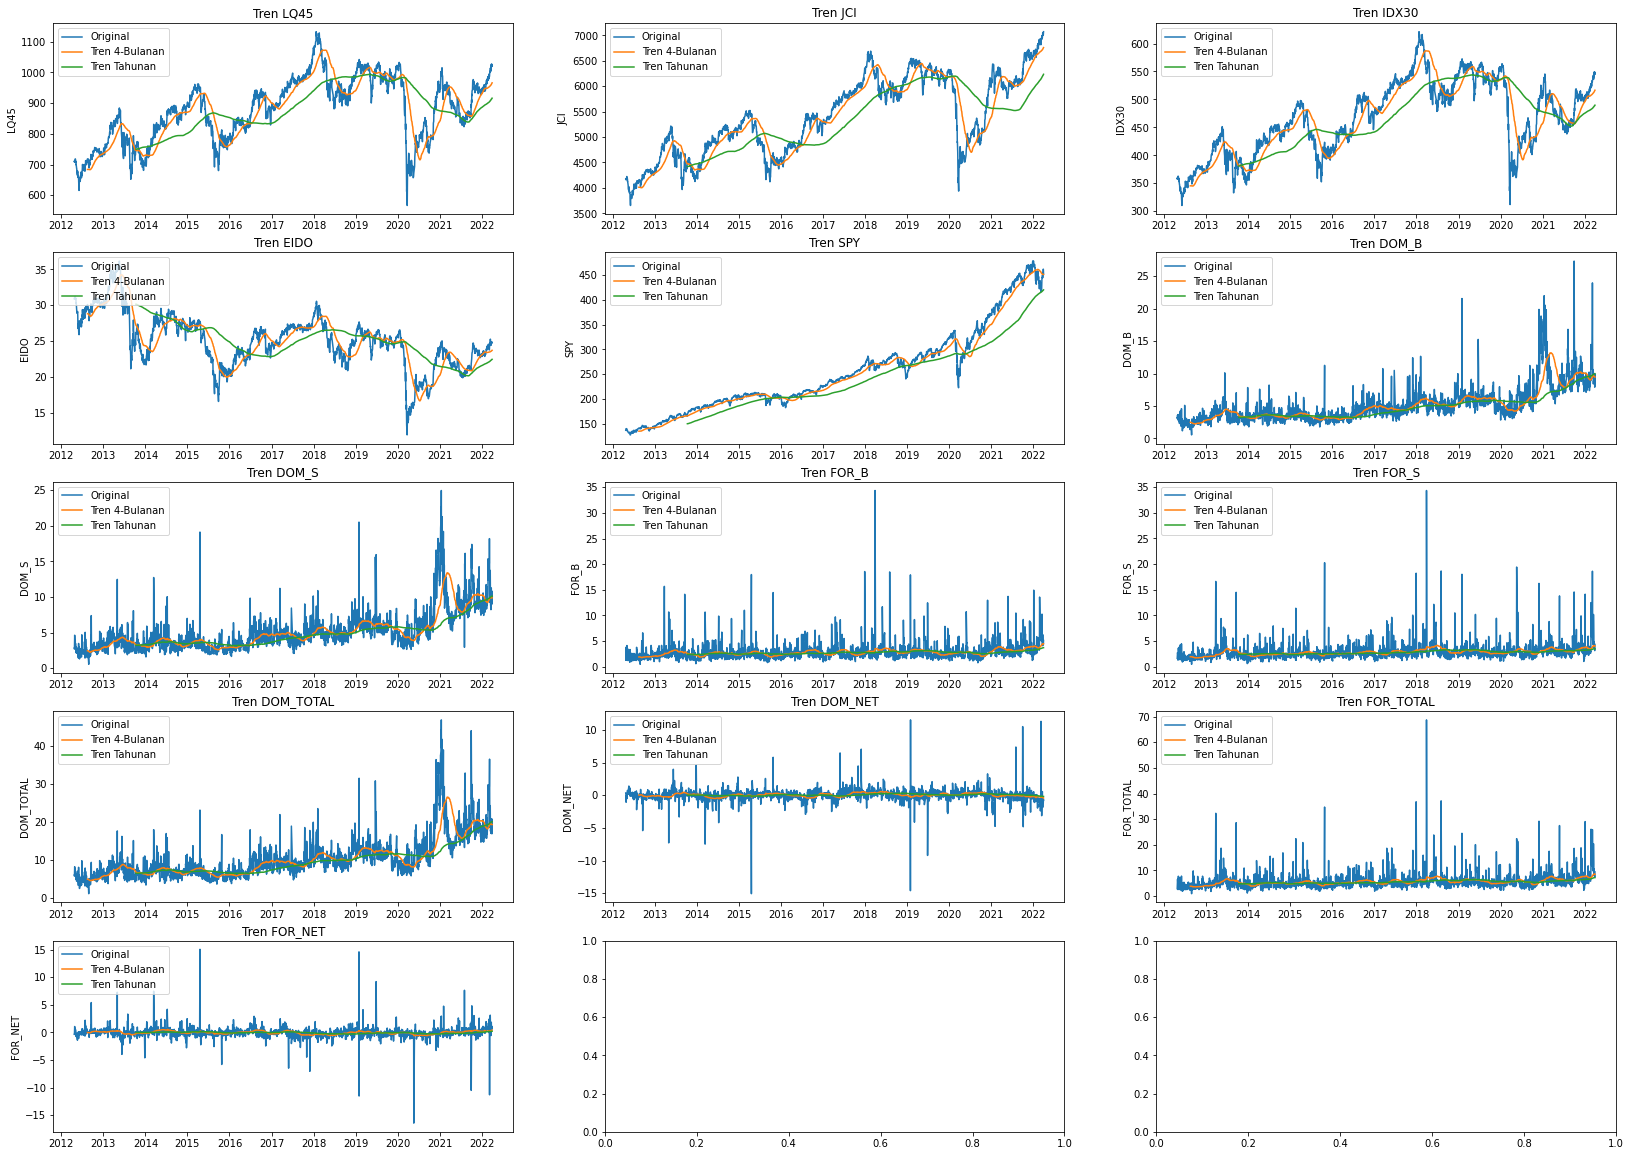

In [10]:
fig, axes = plt.subplots(nrows=5
                        ,ncols=3
                        ,figsize=[28, 20]
                        ,dpi=72
                        )

for i,ax in enumerate(axes.flatten()):
    try:
        ax.set_title(f'Tren {df_proc.columns[i].upper()}')
        sns.lineplot(data=df_proc, x='date', y=df_proc.columns[i], ax=ax, label='Original')
        sns.lineplot(data=df_proc, x='date', y=df_proc[df_proc.columns[i]].rolling(window=80).mean(), ax=ax, label='Tren 4-Bulanan')
        sns.lineplot(data=df_proc, x='date', y=df_proc[df_proc.columns[i]].rolling(window=360).mean(), ax=ax, label='Tren Tahunan')
        ax.set_xlabel('')
        ax.set_ylabel(f'{df_proc.columns[i].upper()}')
        ax.legend(loc='upper left')  
    except:
        pass

plt.show(block=False)

## Plotting: Histogram

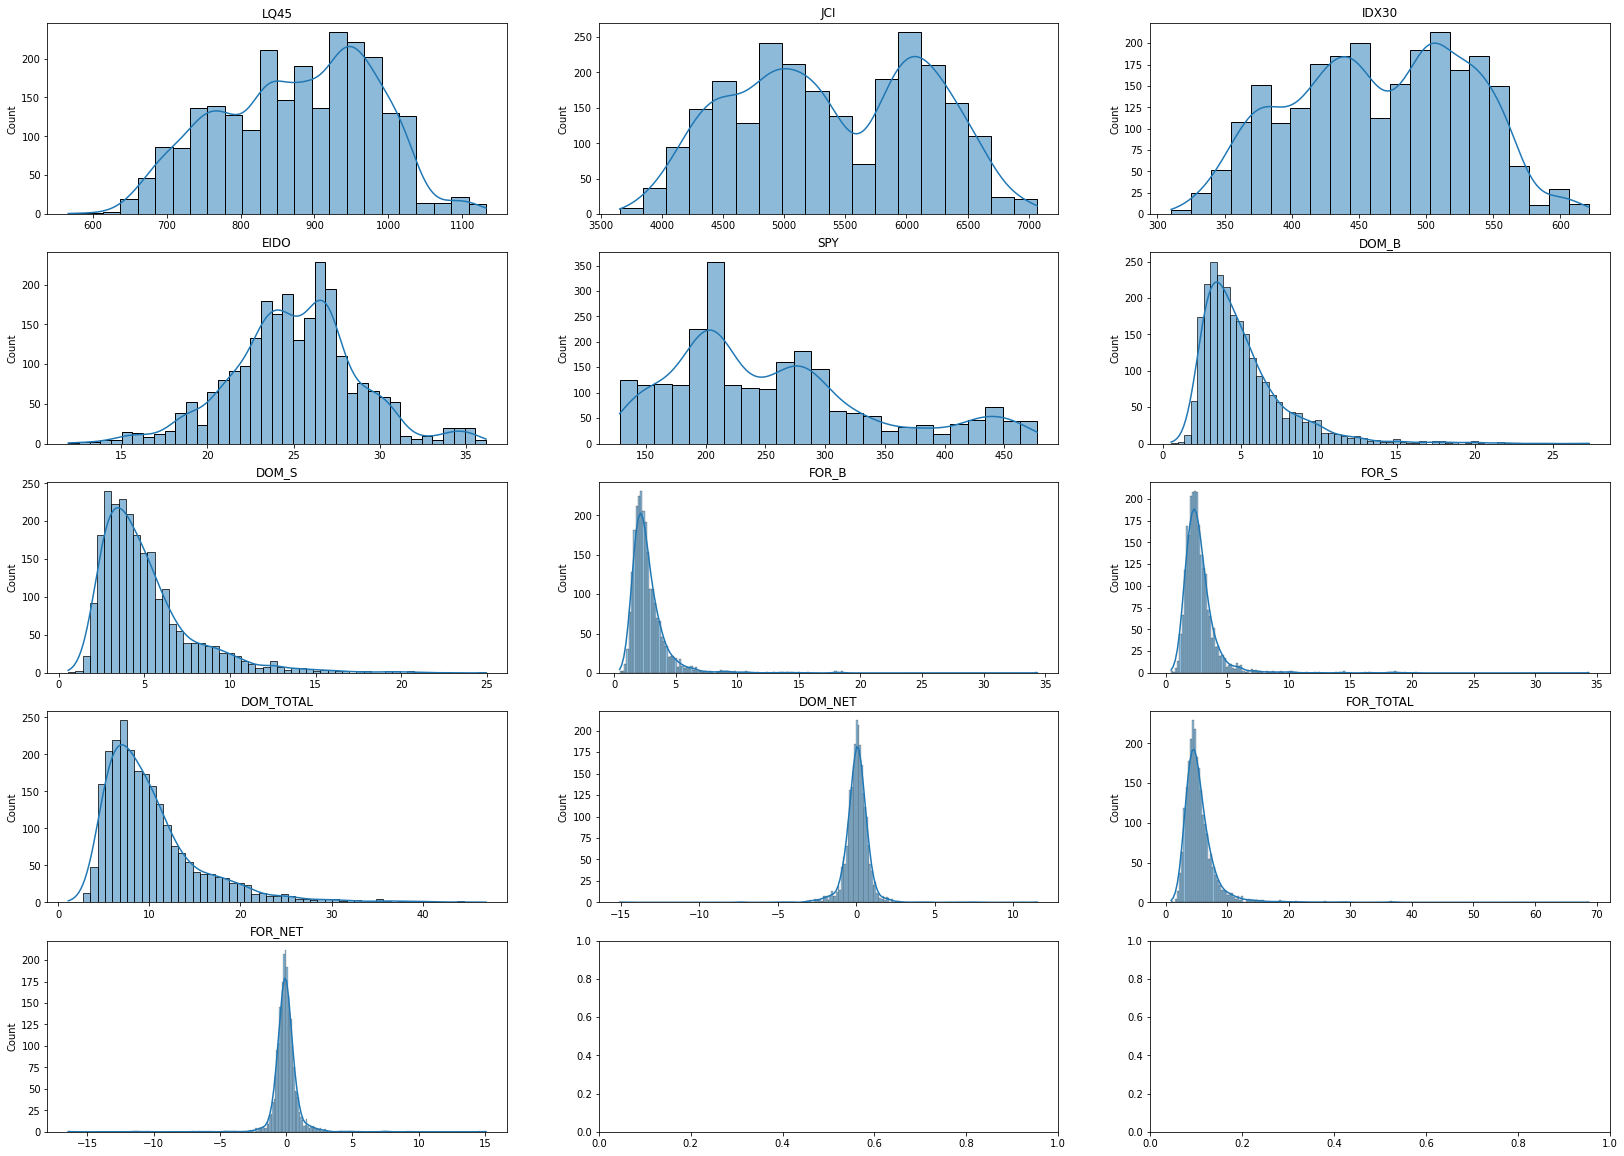

In [11]:
fig, axes = plt.subplots(nrows=5
                        ,ncols=3
                        ,figsize=[28, 20]
                        ,dpi=72
                        )

for i,ax in enumerate(axes.flatten()):
    try:
        ax.set_title(f'{df_proc.columns[i].upper()}')
        sns.histplot(data=df_proc, x=df_proc.columns[i], ax=ax, kde=True)
        ax.set_xlabel('')
    except:
        pass

plt.show(block=False)

## Plotting: Boxplot

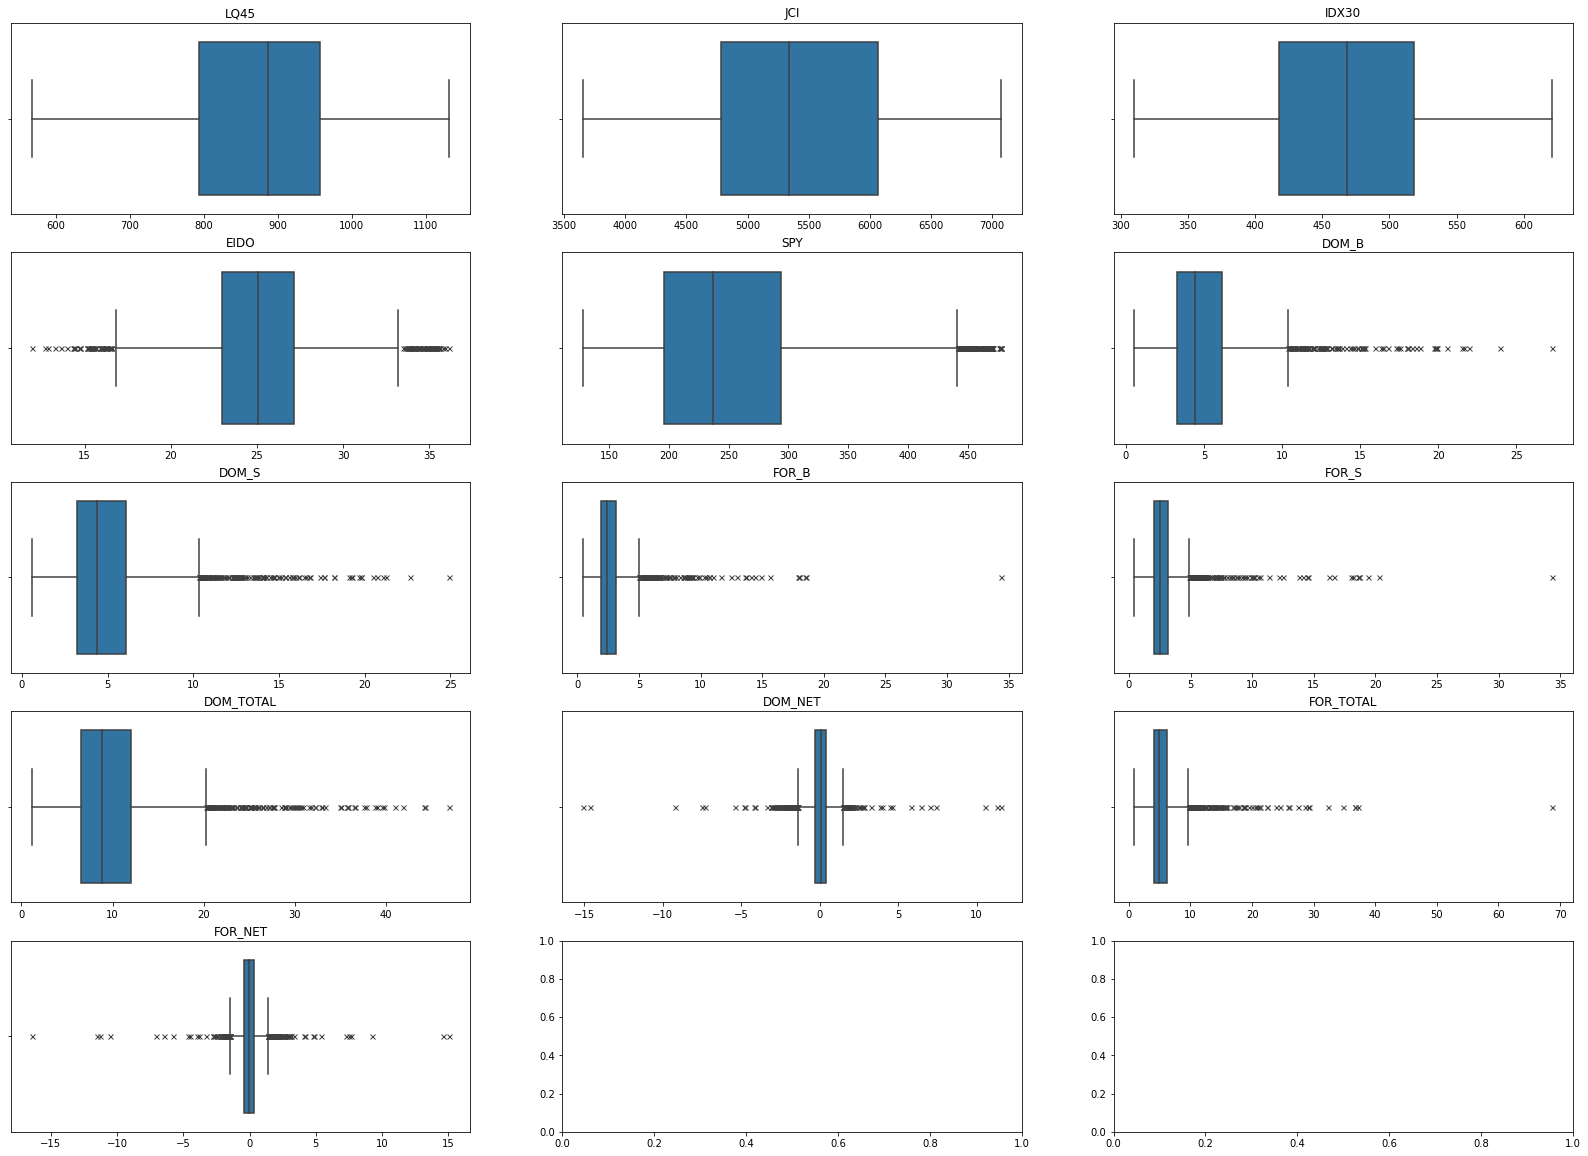

In [12]:
fig, axes = plt.subplots(nrows=5
                        ,ncols=3
                        ,figsize=[28, 20]
                        ,dpi=72
                        )

for i,ax in enumerate(axes.flatten()):
    try:
        ax.set_title(f'{df_proc.columns[i].upper()}')
        sns.boxplot(data=df_proc, x=df_proc.columns[i], ax=ax, flierprops={"marker": "x"},)
        ax.set_xlabel('')
    except:
        pass

plt.show(block=False)

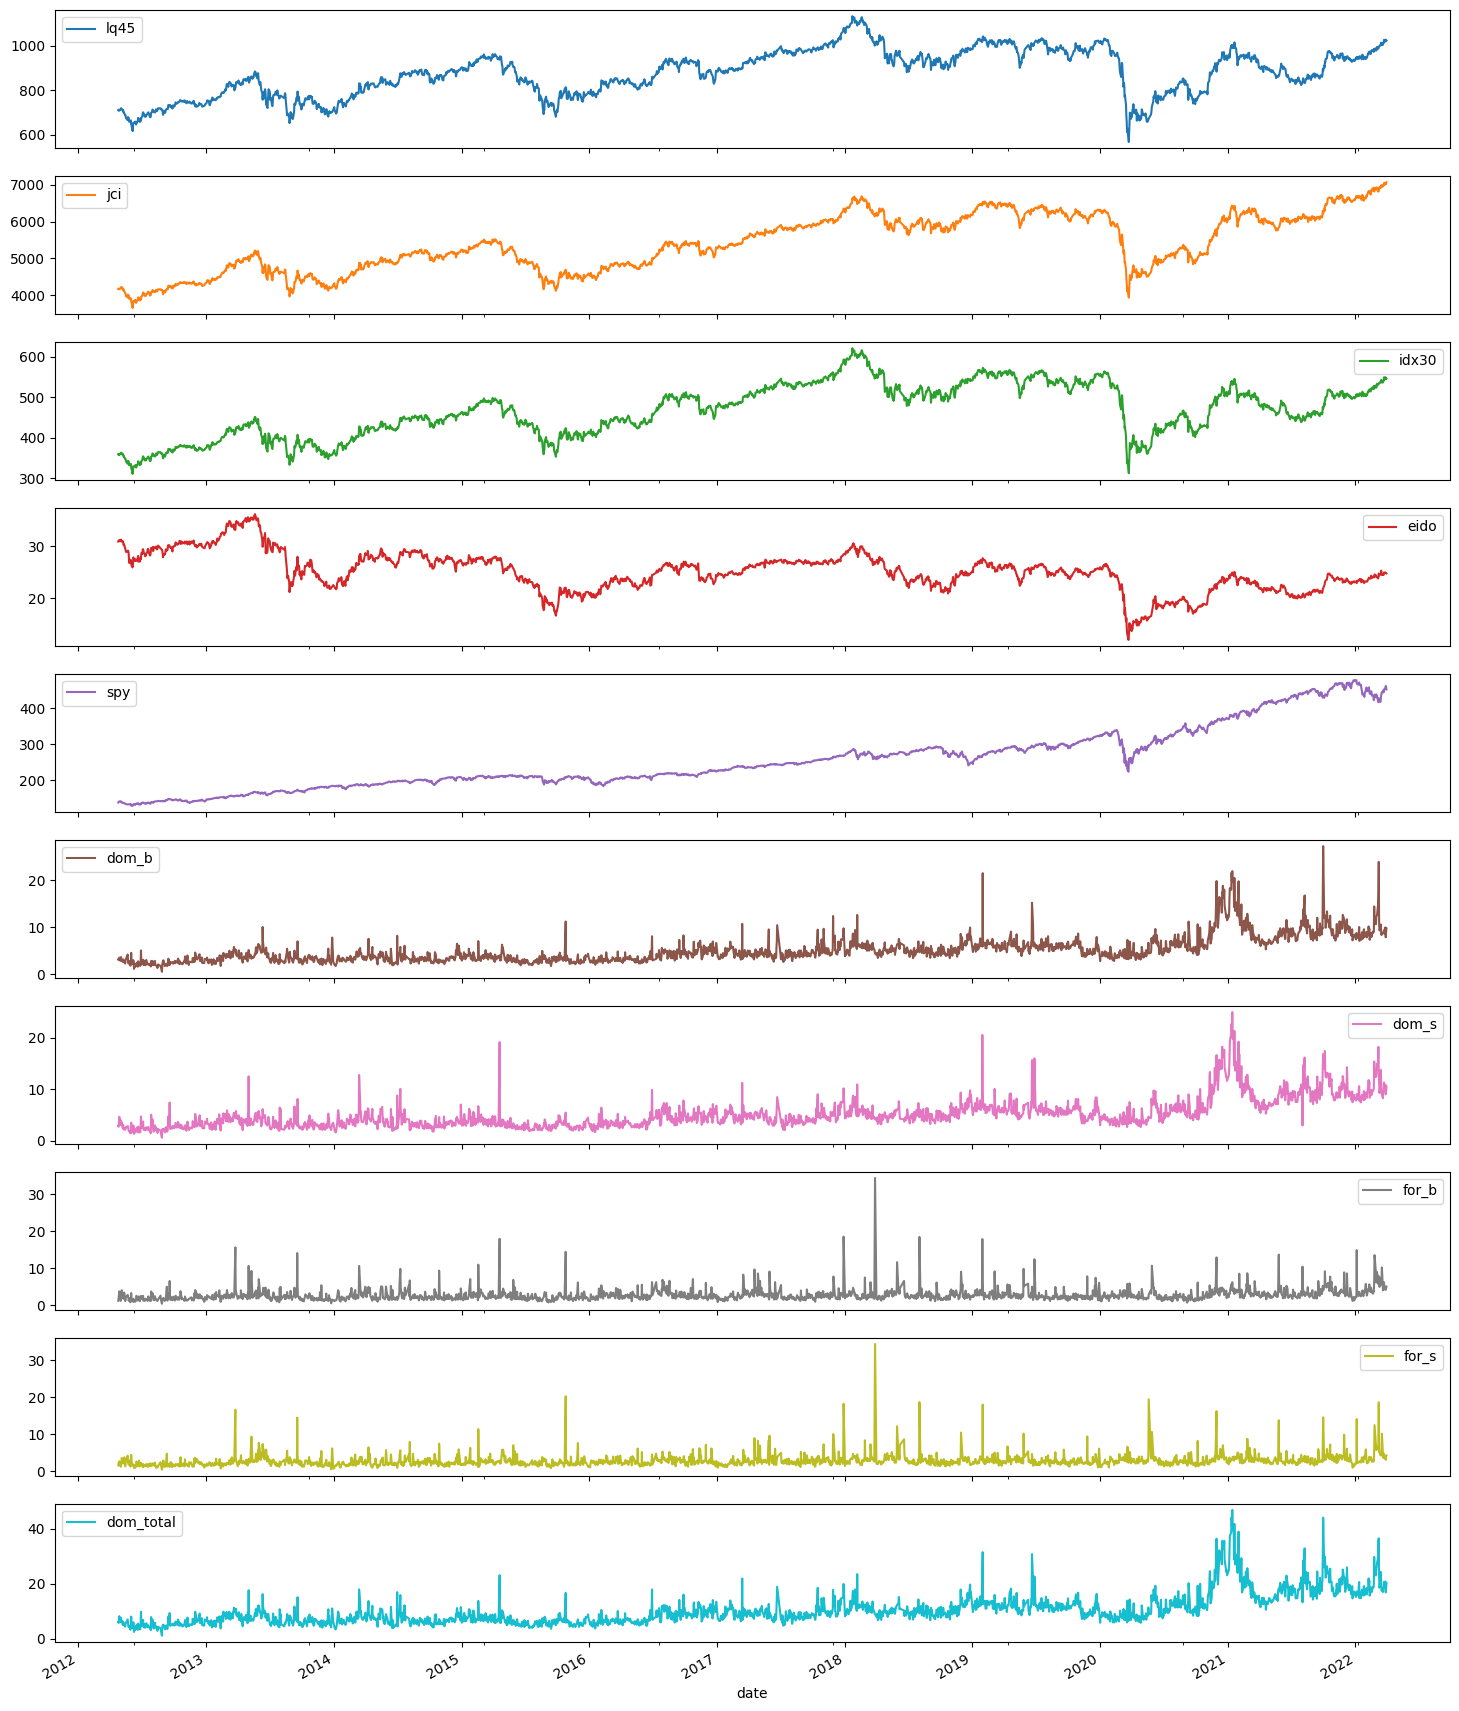

In [14]:
df_proc.loc[:,df_proc.columns[:-3]].plot(subplots=True,figsize =(18,24))
plt.show()

## Resampling: Monthly

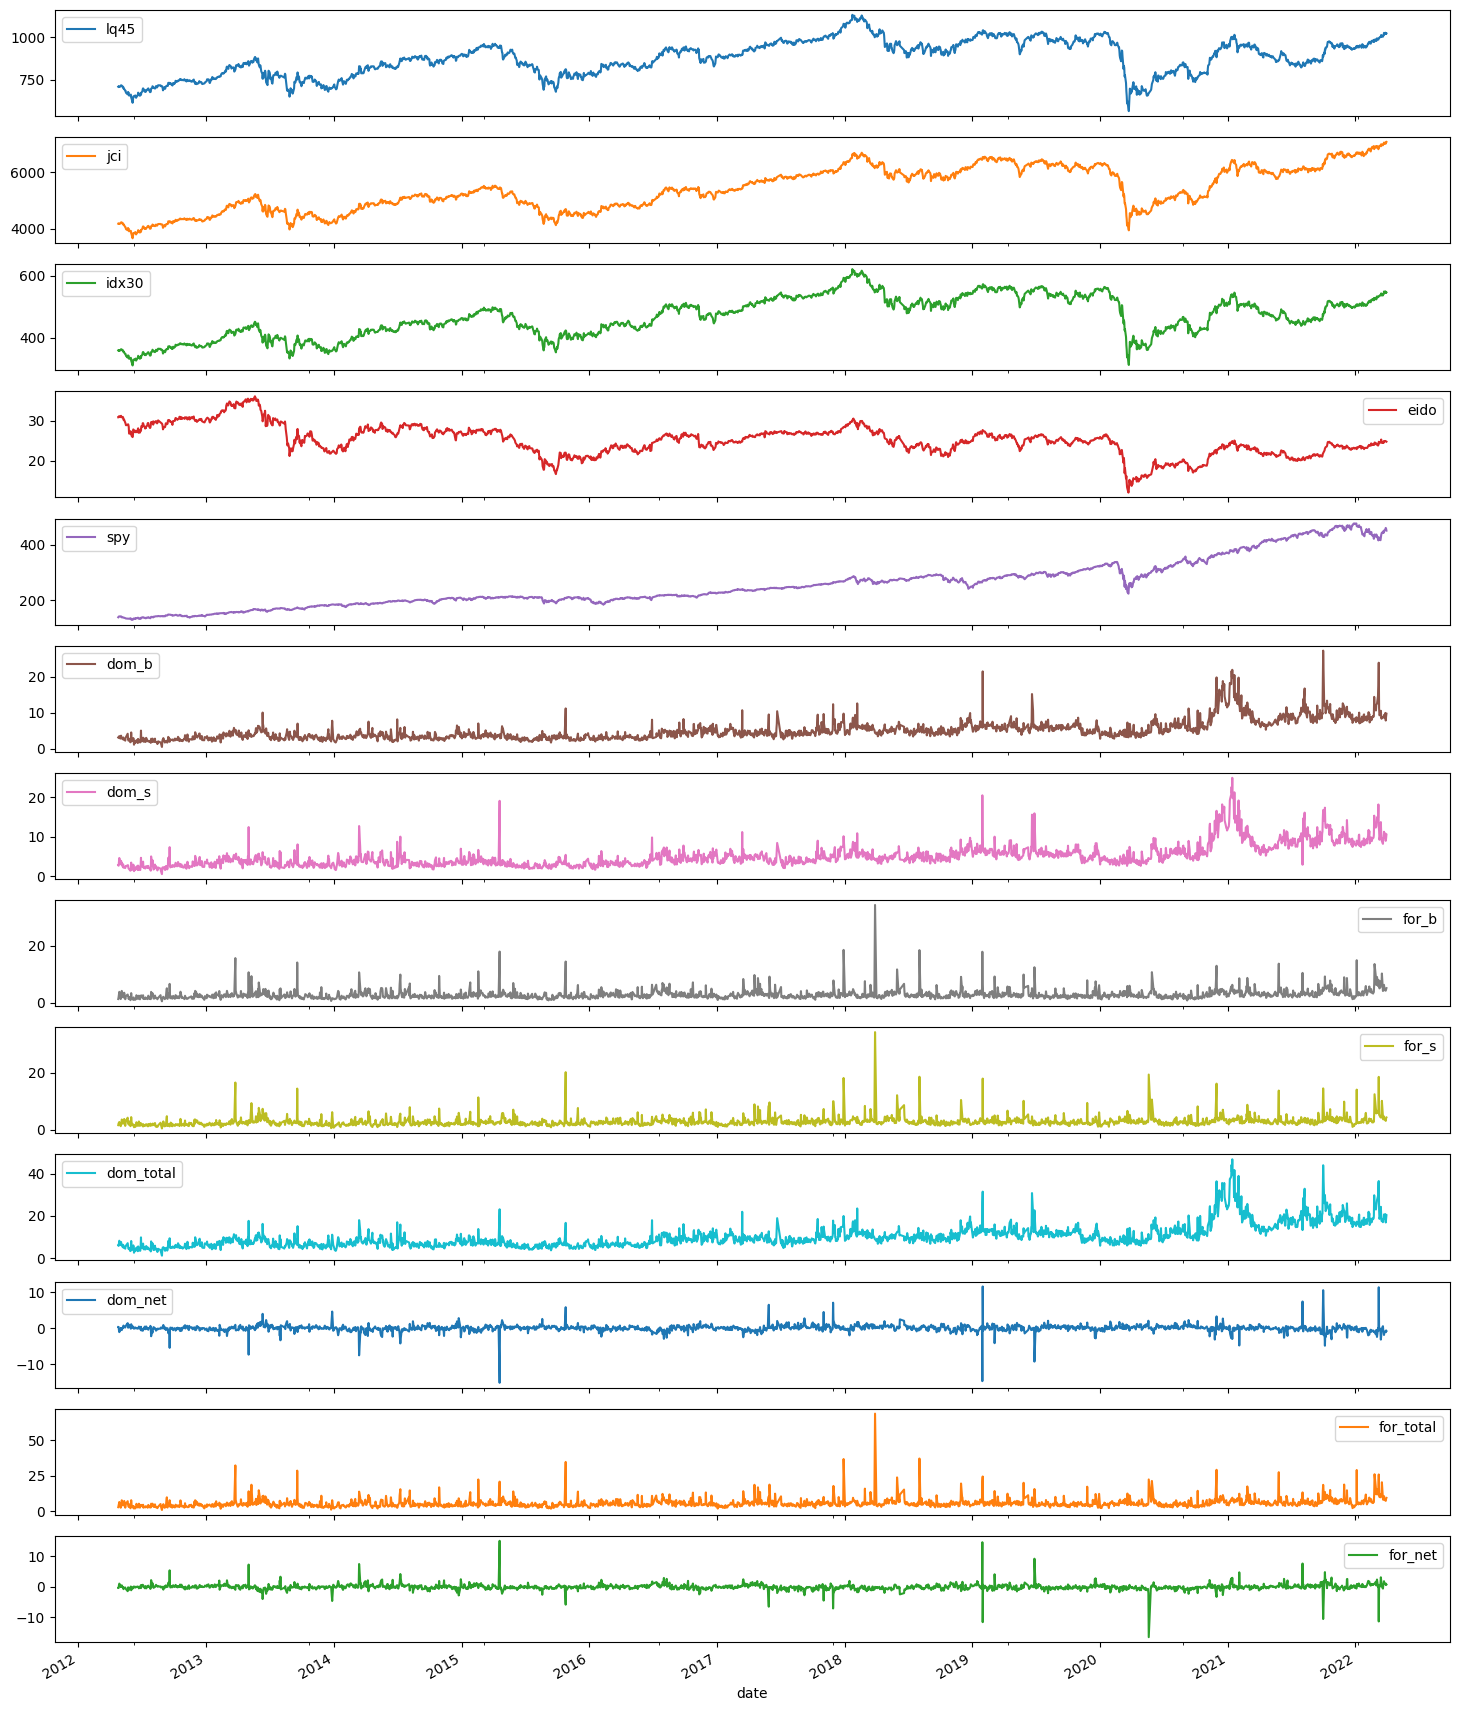

In [13]:
df_proc.plot(subplots=True,figsize =(18,24))
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df_pre['lq45'],#[7:372],   # 3 years
                                #model='additive', 
                                model='multiplicative', 
                                period=360,
                                extrapolate_trend='freq'
                                )

result_mul.seasonal[:720].to_frame().plot(subplots=True,figsize =(18,5))
result_mul.plot()

In [ ]:
df_train=df_pre[(df_pre.index.get_level_values(0) <= '2020-12-31')]
df_test=df_pre[(df_pre.index.get_level_values(0) > '2020-12-31') & (df_pre.index.get_level_values(0) <= '2021-03-31')]

In [ ]:
'''
model = pm.auto_arima(df_pre['lq45'], 
                         m=12, seasonal=True,
                         start_P=1, 
                         max_P=7,
                         start_Q=2,
                         max_Q=20,
                         #max_order=20, 
                         test='adf',
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True, trace=True)
'''
model = pm.auto_arima(df_train['lq45'], 
                        X=df_train.loc[:, df_train.columns[1:]],
                        test='adf',
                        m=12, seasonal=True,
                        start_p=1, start_q=1,
                        max_p=3, max_q=3, 
                        start_P=0, 
                        d=None, D=1,
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)
print(model.summary())

In [ ]:
model.fit(df_train['lq45'])
forecast = model.predict(n_periods=len(df_test), 
                            #exogenous=df_pre.loc[:, df_pre.columns[1:]],
                            return_conf_int=True)
df_forecast = pd.concat([df_test['lq45'].reset_index(),
                        pd.DataFrame(forecast[0], columns=['prediction']).reset_index(drop=True)],
                        axis=1).set_index('date')
df_forecast.tail(20)

In [ ]:
df_forecast.plot(figsize =(15,4))
pyplot.show()



In [ ]:
# Forecast
n_periods = 24
fitted, confint = model.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()